# Models (PyTorch)

Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

The AutoModel class and all of its relatives are actually simple wrappers over the wide variety of models available in the library. It’s a clever wrapper as it can automatically guess the appropriate model architecture for your checkpoint, and then instantiates a model with this architecture.

However, **if you know the type of model you want to use, you can use the class that defines its architecture directly**. Let’s take a look at how this works with a BERT model.

In [1]:
!pip install datasets evaluate transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.6 MB/s eta 0:00:00


In [2]:
from transformers import BertConfig, BertModel

# Building the config
config = BertConfig()

# Building the model from the config
model = BertModel(config)

the hidden_size attribute defines the size of the hidden_states vector, and num_hidden_layers defines the number of layers the Transformer model has

In [3]:
print(config)

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [4]:
from transformers import BertConfig, BertModel

config = BertConfig()
model = BertModel(config)

# Model is randomly initialized!

Loading a Transformer model that is already trained is simple — we can do this using the from_pretrained() method

In the code sample above we didn’t use BertConfig, and instead loaded a pretrained model via the **bert-base-cased identifier.** This is a model checkpoint that was trained by the authors of BERT themselves; you can find more details about it in its model card

In [5]:
from transformers import BertModel

model = BertModel.from_pretrained("bert-base-cased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

The weights have been downloaded and cached (so future calls to the from_pretrained() method won’t re-download them) in the cache folder, which defaults to ~/.cache/huggingface/transformers. You can customize your cache folder by setting the HF_HOME environment variable.

we use the save_pretrained() method

This saves two files to your disk:

Copied
ls directory_on_my_computer
config.json pytorch_model.bin

In [6]:
model.save_pretrained("directory_on_my_computer")

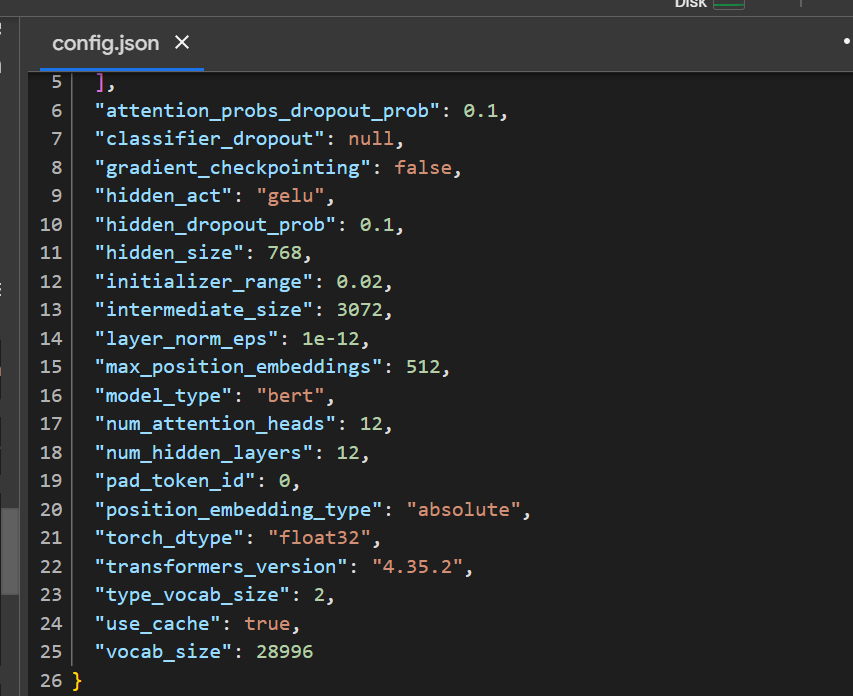

The pytorch_model.bin file is known as the state dictionary; it contains all your model’s weights. The two files go hand in hand; the configuration is necessary to know your model’s architecture, while the model weights are your model’s parameters.

In [7]:
sequences = ["Hello!", "Cool.", "Nice!"]

The tokenizer converts these to vocabulary indices which are typically called input IDs. Each sequence is now a list of numbers!

In [8]:
encoded_sequences = [
    [101, 7592, 999, 102],
    [101, 4658, 1012, 102],
    [101, 3835, 999, 102],
]

In [9]:
import torch

model_inputs = torch.tensor(encoded_sequences)

In [13]:
print(model_inputs.dtype)

torch.int64


In [14]:
output = model(model_inputs)